In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
aslanahmedov_market_basket_analysis_path = kagglehub.dataset_download('aslanahmedov/market-basket-analysis')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx
/kaggle/input/market-basket-analysis/Assignment-1_Data.csv


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aslanahmedov/market-basket-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/market-basket-analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Importing make_subplots

from mlxtend.frequent_patterns import apriori,association_rules


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/kaggle/input/market-basket-analysis/Assignment-1_Data.csv",sep=";")
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
df.shape

(522064, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.describe()

,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


In [ ]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
df.dropna(subset=['Itemname','CustomerID'],inplace=True)
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [ ]:
df.duplicated().sum()

5210

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(382813, 7)

In [ ]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
# Convert CustomerID to string and remove trailing .0 if present
df["CustomerID"] = df["CustomerID"].astype(str).str.replace(".0", "", regex=False)

# Strip whitespace from Itemname
df["Itemname"] = df["Itemname"].str.strip()

# Convert BillNo to string
df["BillNo"] = df["BillNo"].astype(str)

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y %H:%M", errors='coerce')


In [ ]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)

In [ ]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


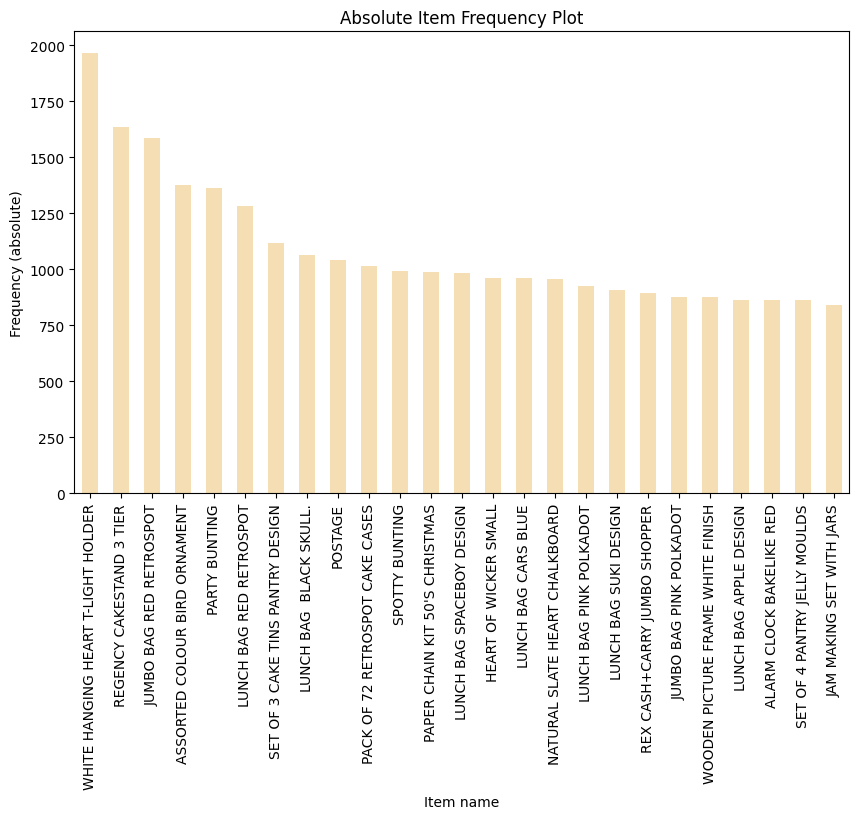

In [ ]:
# calculate item frequecies
item_freq = df['Itemname'].value_counts().sort_values(ascending = False).head(25)

plt.figure(figsize=(10, 6))
item_freq.plot(kind='bar', color='wheat')
plt.xlabel('Item name')
plt.ylabel('Frequency (absolute)')
plt.title('Absolute Item Frequency Plot')
plt.show()

In [ ]:
baskets = (df.groupby(["BillNo","Itemname"])["Quantity"].sum().unstack()).fillna(0)
baskets

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,24.0,0.0,0.0


In [ ]:
def to_bool(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

In [ ]:
basketbool = baskets.apply(lambda col: col.map(to_bool))
basketbool

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
frequent_combos = apriori(basketbool, min_support=0.02, use_colnames=True)
frequent_combos

,support,itemsets
0,0.021527,(3 STRIPEY MICE FELTCRAFT)
1,0.039256,(6 RIBBONS RUSTIC CHARM)
2,0.024666,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.034686,(60 TEATIME FAIRY CAKE CASES)
4,0.026427,(72 SWEETHEART FAIRY CAKE CASES)
...,...,...
235,0.020922,"(PARTY BUNTING, SPOTTY BUNTING)"
236,0.022408,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY..."
237,0.024170,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI..."
238,0.021307,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE..."


In [ ]:
rules = association_rules(frequent_combos, metric="lift", min_threshold=1)
rules.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.035952,0.028960,0.023785,0.661562,22.844013,0.022743,2.869182,0.991885
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.028960,0.035952,0.023785,0.821293,22.844013,0.022743,5.394565,0.984743
10,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040412,0.035952,0.027859,0.689373,19.174712,0.026406,3.103557,0.987765
11,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.035952,0.040412,0.027859,0.774885,19.174712,0.026406,4.262660,0.983196
60,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.040412,0.028960,0.022408,0.554496,19.146976,0.021238,2.179643,0.987687
...,...,...,...,...,...,...,...,...,...,...
18,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.086605,0.043055,0.021582,0.249205,5.788129,0.017854,1.274577,0.905668
58,(PARTY BUNTING),(SPOTTY BUNTING),0.074437,0.053956,0.020922,0.281065,5.209169,0.016905,1.315897,0.873015
59,(SPOTTY BUNTING),(PARTY BUNTING),0.053956,0.074437,0.020922,0.387755,5.209169,0.016905,1.511753,0.854115
23,(LUNCH BAG RED RETROSPOT),(JUMBO BAG RED RETROSPOT),0.069702,0.086605,0.023069,0.330964,3.821547,0.017032,1.365240,0.793645
